In [22]:
import os
import random
import shutil
import re
import pandas as pd
## specify what type of files
from glob import glob 
pre = "/data/liu/Images"
split_pre = "/data/liu/dog_breeds"
# pre

In [17]:
dirs = os.listdir(pre)
label_name = [name.split('-')[:2] for name in dirs]

In [18]:
dog_breed_item = pd.DataFrame(label_name,columns=['breed_id','breed'])
dog_breed_item.head()

breed_id                      breed
0  n02107683       Bernese_mountain_dog
1  n02093256  Staffordshire_bullterrier
2  n02105641       Old_English_sheepdog
3  n02102318             cocker_spaniel
4  n02110185             Siberian_husky

In [24]:
dog_id = []
i=0
for breed in dirs:
    i+=1
    dog_id += glob(os.path.join(pre,breed,'*.jpg'))

In [31]:
dog_breed_id = [dog.split('/')[-2:] for dog in dog_id]

In [38]:
dog_breed_id = [dog[0].split('-')[:2]+[dog[1]] for dog in dog_breed_id]
dog_breed_item = pd.DataFrame(dog_breed_id,columns=['breed_id','breed','id'])
dog_breed_item.head()

breed_id                 breed                  id
0  n02107683  Bernese_mountain_dog   n02107683_265.jpg
1  n02107683  Bernese_mountain_dog  n02107683_2771.jpg
2  n02107683  Bernese_mountain_dog  n02107683_1542.jpg
3  n02107683  Bernese_mountain_dog  n02107683_4410.jpg
4  n02107683  Bernese_mountain_dog  n02107683_7196.jpg

In [39]:
dog_breed_item.to_csv(os.path.join(split_pre,'all_dogs.csv'),index=False)

In [42]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(dog_breed_item, test_size=0.20,\
                                     random_state=5242, stratify=dog_breed_item['breed'])

print(len(df_train))
print(len(df_test))

16464
4116


In [43]:
df_test.to_csv(os.path.join(split_pre,'df_test.csv'),index=False)

In [44]:
df_train_train, df_val = train_test_split(df_train, test_size=0.20,\
                                     random_state=5242, stratify=df_train['breed'])
print(len(df_train_train))
print(len(df_val))

13171
3293


In [45]:
df_train_train.to_csv(os.path.join(split_pre,'df_train.csv'),index=False)

In [46]:
df_val.to_csv(os.path.join(split_pre,'df_val.csv'),index=False)

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 15))

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

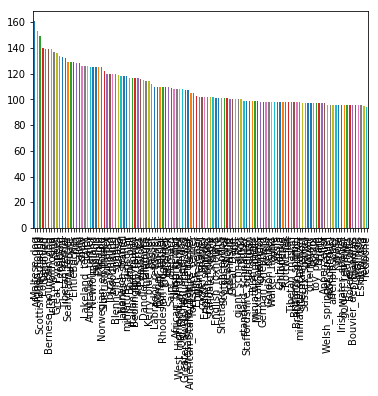

In [53]:
df_train_train['breed'].value_counts().plot(kind='bar')
plt.show()

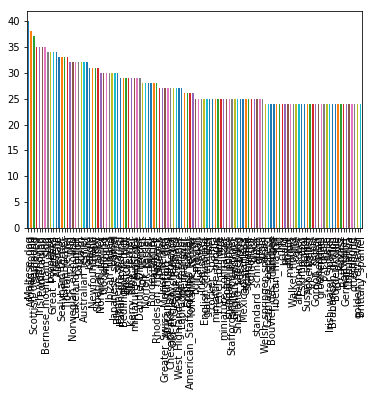

In [54]:
df_val['breed'].value_counts().plot(kind='bar')
plt.show()

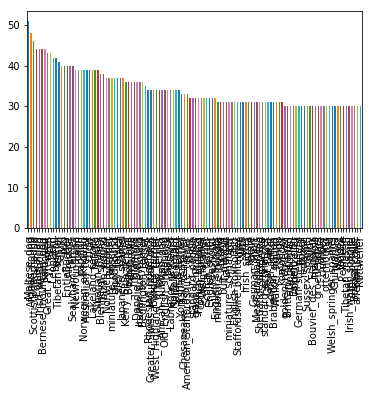

In [55]:
df_test['breed'].value_counts().plot(kind='bar')
plt.show()